### what is a causal system in signal processing?

In signal processing, a system is considered **causal** if its output at any time depends only on past and present inputs, not on future inputs. This means that the system's response at time $t$ is determined solely by the input values up until time $t$ (including the current input at time $t$) and is independent of any input that will occur after time $t$. Causality is a fundamental concept when designing or analyzing systems for real-time processing, control systems, and various applications in electrical engineering and computer science.

### Characteristics of a Causal System

1. **No Future Dependence**: The output of a causal system at any given time cannot be influenced by future input values. This is intuitive in real-world systems, where future events cannot influence current or past outcomes.

2. **Implementation in Real-Time**: Causal systems can be implemented in real-time because they do not require knowledge of future input signals. This makes them particularly relevant for practical applications, such as live audio processing, real-time video effects, and control systems that react to changing conditions.

3. **Impulse Response**: The impulse response of a causal system is zero for all negative times. That is, $h(t) = 0$ for $t < 0$, where $h(t)$ represents the system's response to a delta function (or impulse) input at time zero. This property is used in the analysis of systems, especially when applying convolution to determine the output signal based on the input signal and the system's impulse response.

4. **Stability Consideration**: While causality and stability are independent concepts, in practice, a causal system's design also often considers stability—ensuring that the output remains bounded for a bounded input. However, it's essential to understand that a system can be causal but not stable, and vice versa.

### Examples

- **Digital Filters**: A digital filter is causal if its output at any sample $n$ depends only on the current and past input samples, not on future samples. For example, a simple moving average filter that calculates the average of the last $N$ samples to produce the current output is causal.

- **Feedback Control Systems**: In a feedback control system, the controller adjusts its outputs (e.g., to actuators) based on the current and past states of the system it controls (e.g., temperature, speed). Such systems are inherently causal because they cannot act on future states of the system.

### Mathematical Representation

A linear time-invariant (LTI) system can be described by a differential or difference equation. For continuous-time systems, if the equation can be written so that the output $y(t)$ depends on past and present values of the input $x(t)$ and past values of $y(t)$, the system is causal. For discrete-time systems, a similar condition holds with respect to discrete instances $n$.

In sum, causality is a key attribute for systems that must operate in real time, reflecting a natural limitation that future inputs cannot affect current or past outputs. This principle guides the design and analysis of many types of systems in signal processing and related fields.

Let's generate a simple example in Julia that demonstrates a causal system. We'll create a discrete-time causal filter that applies a basic moving average to a signal. This is a common operation in signal processing used to smooth out short-term fluctuations and highlight longer-term trends or cycles.

A moving average filter is causal because the output at any point in time depends only on the current and past input values. We'll implement a simple moving average where each output value is the average of the current and the previous two input values (i.e., a 3-point moving average).

Here's how you can do this in Julia:

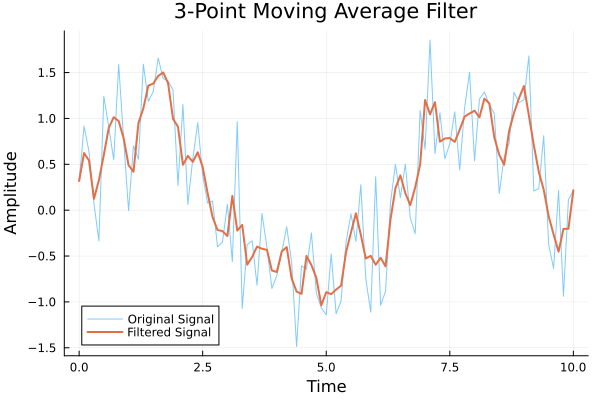

In [1]:
using Plots

# Function to apply a 3-point moving average causal filter
function moving_average_filter(signal)
    filtered_signal = copy(signal)
    for i in 2:length(signal)-1
        filtered_signal[i] = (signal[i-1] + signal[i] + signal[i+1]) / 3
    end
    return filtered_signal
end

# Generate a noisy signal for demonstration
t = 0:0.1:10  # Time vector
signal = sin.(t) .+ 0.5*randn(length(t))  # Sinusoidal signal with added noise

# Apply the causal filter
filtered_signal = moving_average_filter(signal)

# Plot the original and filtered signals
plot(t, signal, label="Original Signal", alpha=0.5)
plot!(t, filtered_signal
    , label="Filtered Signal", linewidth=2
    , xlabel = "Time", ylabel = "Amplitude"
    , title = "3-Point Moving Average Filter"
)

In this example:
- We create a noisy signal by adding random noise to a sine wave.
- The `moving_average_filter` function computes the moving average of the signal, excluding the first and last points for simplicity (since a 3-point average cannot be applied directly at the boundaries without padding or other decisions).
- Finally, we plot the original noisy signal and the smoothed signal after applying the moving average filter to visualize the effect of this causal system.

This demonstrates a simple causal system in practice, highlighting how the output (filtered signal) at any time depends only on the present and past inputs, adhering to the causality principle.

An **anticasual system** is one where the output at any given time depends on future inputs. Anticausal systems are not implementable in real-time scenarios since they require future data to compute outputs. However, they can be conceptualized in theoretical contexts or used in post-processing scenarios where the entire signal is known beforehand, such as in signal analysis or offline processing of recorded data.

To illustrate an anticausal system with a simple example in Julia, consider a scenario where we "predict" a value based solely on future values in a discrete signal. A simple anticausal operation could be to create an output signal where each point is, for instance, an average of the next two points in the input signal. Remember, this operation cannot be performed in real time because it requires knowledge of future signal values.

Here's how you might represent this anticausal operation in Julia:



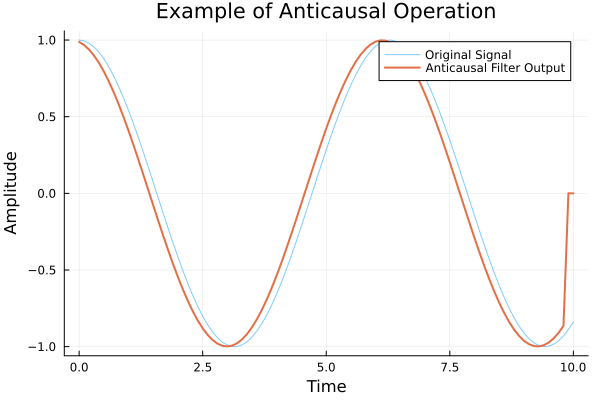

In [2]:
# Define a function for an anticausal filter
# This filter creates an output signal where each point is the average of the next two points in the input signal.
function anticausal_filter(signal)
    n = length(signal)
    filtered_signal = zeros(n)
    for i in 1:n-2
        filtered_signal[i] = (signal[i+1] + signal[i+2]) / 2
    end
    return filtered_signal
end

# Generate a signal
t = 0:0.1:10  # Time vector
signal = cos.(t)  # Cosine signal

# Apply the anticausal filter
filtered_signal = anticausal_filter(signal)

# Plot the original and "anticausally filtered" signals
using Plots
plot(t, signal, label="Original Signal", alpha=0.5)
plot!(t, filtered_signal
    , label="Anticausal Filter Output", linewidth=2
    , title = "Example of Anticausal Operation"
    , xlabel = "Time", ylabel = "Amplitude"
)

In this example, the `anticausal_filter` function produces an output signal where each point is based on the future points of the input signal, specifically the next two points. This operation is conceptual and could be used for analysis or processing of a signal where the entire dataset is available, such as in data smoothing or estimation tasks performed after data collection.

This anticausal example demonstrates how outputs are derived from future inputs, contrasting with causal systems where outputs depend solely on past and present inputs. It's important to reiterate that while anticausal systems are useful in certain theoretical and analytical contexts, they are not applicable for real-time processing due to the inherent requirement of future data.

A **non-causal system** is one that relies on both past and future inputs to generate the current output, making it impossible to implement in real-time without access to the entire signal beforehand. Such systems are often used in signal processing for analysis, filtering, or prediction tasks where the signal is fully known or recorded.

As an example, let's design a simple non-causal filter in Julia that averages the current sample with one previous and one future sample. This filter requires knowledge of the signal both before and after the current point, which is typical for non-causal systems.

Here's how you can implement and demonstrate a non-causal filter in Julia:

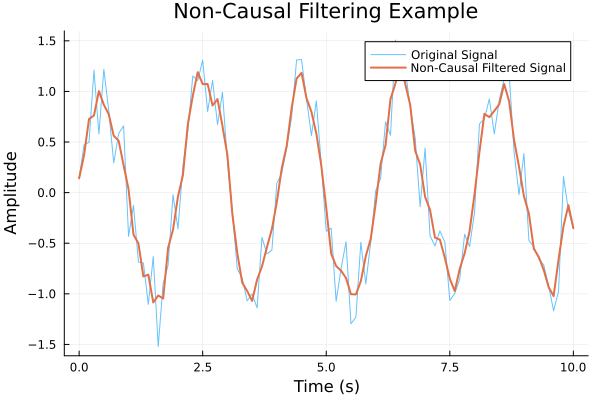

In [3]:
using Plots

# Define a non-causal filter function
# This filter averages each point with its previous and next points.
function non_causal_filter(signal)
    n = length(signal)
    filtered_signal = copy(signal)  # Initialize with the original signal to maintain boundary values
    for i in 2:n-1
        filtered_signal[i] = (signal[i-1] + signal[i] + signal[i+1]) / 3
    end
    return filtered_signal
end

# Generate a simple signal for demonstration
t = 0:0.1:10  # Time vector
signal = sin.(2π * 0.5 * t) .+ 0.25 * randn(length(t))  # Sinusoidal signal with added noise

# Apply the non-causal filter
filtered_signal = non_causal_filter(signal)

# Plot the original and filtered signals for comparison
plot(t, signal, label="Original Signal", alpha=0.6)
plot!(t, filtered_signal
    , label="Non-Causal Filtered Signal", linewidth=2
    , title="Non-Causal Filtering Example"
    , xlabel="Time (s)", ylabel="Amplitude"
)


This example illustrates the application of a non-causal filter, where the output at each point depends on both the preceding and following points of the input signal. It's a common approach in scenarios where the entire dataset is available for processing, such as in offline data analysis or in image processing where the entire image is known before processing begins.

Remember, the concept of non-causality is primarily theoretical in the context of signal processing and is applicable in scenarios where latency is not a concern, or the data can be buffered, allowing future data points to be accessed as needed.

# References

- [ ] [Causal System](https://en.wikipedia.org/wiki/Causal_system)
- [ ] [Signals and Systems – Causal and Non-Causal System](https://www.tutorialspoint.com/signals-and-systems-causal-and-non-causal-system)